<a href="https://colab.research.google.com/github/YarkoMarko/liner/blob/main/module3/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv", index_col='Unnamed: 0')

In [55]:
df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


# Завдання 1
Очистіть дані від викидів, виведіть основні числові характеристики та намалюйте точкову діаграму

In [66]:
df = df.dropna()
df

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


<Axes: >

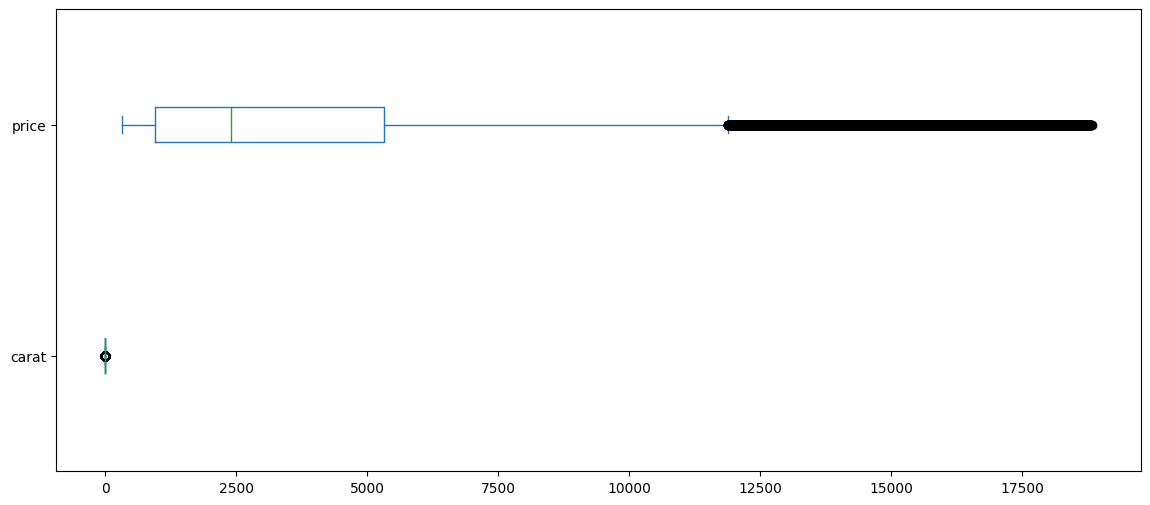

In [46]:
df.plot(kind="box", vert=False, figsize=(14, 6))

<Axes: >

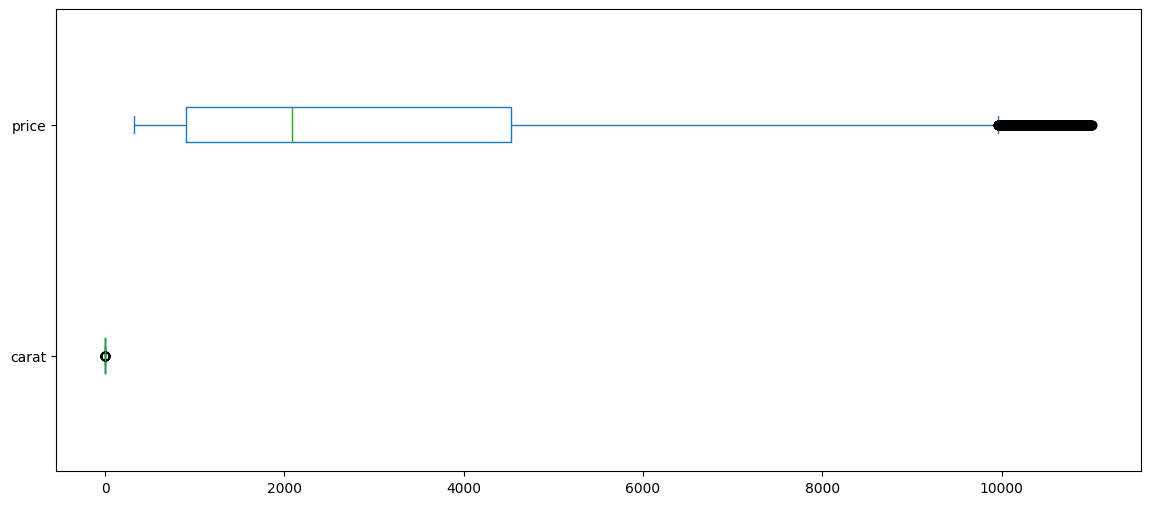

In [28]:
# def remove(df, column_):
#   column = df[column_]

#   q1 = column.quantile(q=0.25)
#   q3 = column.quantile(q=0.75)
#   iqr = q3 - q1

#   lower = q1 - iqr * 1.5
#   upper = q3 + iqr * 1.5

#   mask = (column >= lower) & (column <= upper)

#   return df[mask]

# for column__ in df.columns:
#   df = remove(df, column__)

# df.plot(kind="box", vert=False, figsize=(14, 6))

In [47]:
df.shape

(53940, 2)

In [67]:
df.describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


<Axes: xlabel='price', ylabel='carat'>

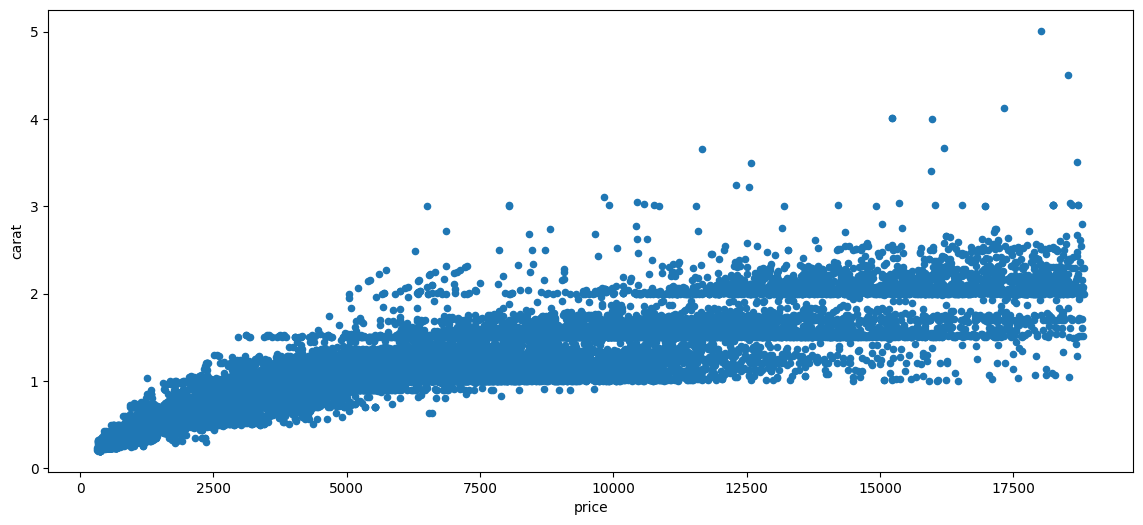

In [40]:
df.plot(kind="scatter", x="price", y="carat", figsize=(14, 6))

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [74]:
from sklearn.model_selection import train_test_split
y = df["price"]
X = df.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

(53940,)
(53940, 1)


# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(X_test)
model.coef_

array([7768.91049036])

In [81]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df_ = pd.DataFrame()

  df_.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df_.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df_.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df_.round(2)

In [83]:
all_metrics = pd.DataFrame()

In [84]:
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)
all_metrics["mean"] = get_metrics(y_test, np.full_like(y_test, y_test.mean()), "mean")

In [85]:
all_metrics

,train,test,mean
MAE,1008.56,1009.50,3011.23
RMSE,1548.28,1549.64,3987.08
R2,0.85,0.85,-0.00


# Завдання 4
Напишіть рівняння регресії за прикладом:
Бал_літній = 1.02*Бал_зимовий -15.6

In [90]:
model.coef_

array([7768.91049036])

In [88]:
model.intercept_

-2261.9117456492177

In [95]:
print(f"price = {model.coef_[0]}*carat{model.intercept_}")

price = 7768.910490360821*carat-2261.9117456492177


# Завдання 5 (оптимально)
Додайте в таблицю новий стовпчик carat**2. Знову натренуйте модель та напишіть рівняння регресії. Порівняйте дві моделі за метриками